# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Logistic Regression Project (Raisin_Class_Prediction)</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>If you want to be the first to know about new updates, please don't forget to follow us. </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

**Data Set Information:**

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


**Attribute Information:**

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

https://www.researchgate.net/publication/347934123_Classification_of_Raisin_Grains_Using_Machine_Vision_and_Artificial_Intelligence_Methods

# <font color='green'> <b>Exploratory Data Analysis (EDA) and Visualization</b><font color='black'>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf   # !pip install cufflinks

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [3]:
#!pip install cufflinks --quiet

In [30]:
data = pd.read_excel('Raisin_Dataset.xlsx')
df = data.copy()
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [32]:
df.shape

(900, 8)

In [33]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [34]:
df.duplicated().sum()

0

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


In [36]:
df['Class'].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

In [28]:
# Data is balanced

In [39]:
df["Class"] = df["Class"].map({"Kecimen":0,"Besni":1}) 


In [42]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,1
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,1
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,1
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,1


In [44]:
df.corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352,0.625715
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978,0.673194
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417,0.503102
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845,0.438500
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612,0.625567
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449,-0.154689
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000,0.665981
Class,0.625715,0.673194,0.503102,0.438500,0.625567,-0.154689,0.665981,1.000000


# <font color='green'> <b>Logistic Regression Model</b><font color='black'>

## <font color='blue'> <b>Train | Test Split and Scaling</b><font color='black'>

In [43]:
X = df.drop(["Class"], axis=1)
y = df["Class"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## <font color='blue'> <b>Logistic Regression with Pipeline</b><font color='black'>

In [46]:
scaler = StandardScaler()
log_model = LogisticRegression()
log_pipe = Pipeline([("scaler",scaler),("log_model",log_model)]) 
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_model', LogisticRegression())])

In [47]:
y_pred = log_pipe.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0])

In [48]:
y_pred_proba = log_pipe.predict_proba(X_test)
y_pred_proba

array([[2.22491279e-01, 7.77508721e-01],
       [7.75253213e-01, 2.24746787e-01],
       [9.79163695e-01, 2.08363054e-02],
       [4.08436295e-02, 9.59156370e-01],
       [9.77872377e-01, 2.21276226e-02],
       [5.23348404e-01, 4.76651596e-01],
       [9.84225656e-01, 1.57743439e-02],
       [4.84816531e-01, 5.15183469e-01],
       [6.59357758e-01, 3.40642242e-01],
       [6.58939542e-01, 3.41060458e-01],
       [2.69265792e-01, 7.30734208e-01],
       [2.67269846e-02, 9.73273015e-01],
       [1.16910299e-02, 9.88308970e-01],
       [8.01577900e-01, 1.98422100e-01],
       [1.56067163e-03, 9.98439328e-01],
       [6.23821092e-03, 9.93761789e-01],
       [3.58130951e-01, 6.41869049e-01],
       [9.89458182e-01, 1.05418180e-02],
       [6.25731375e-01, 3.74268625e-01],
       [2.93910459e-01, 7.06089541e-01],
       [8.30680222e-01, 1.69319778e-01],
       [6.18664446e-03, 9.93813356e-01],
       [9.20970758e-01, 7.90292424e-02],
       [8.92049635e-01, 1.07950365e-01],
       [9.584754

## <font color='blue'> <b>X_test + y_yest + y_pred + y_pred_proba</b><font color='black'>

In [49]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred_proba"] = y_pred_proba[:,1]
test_data["pred"] = y_pred
test_data.sample(10)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred_proba,pred
139,110616,461.144553,306.899065,0.746384,112150,0.752398,1252.875,0,0.730734,1
398,82886,424.822709,253.171548,0.803024,85879,0.648281,1163.528,0,0.640643,1
63,64717,342.576710,245.732037,0.696759,66649,0.662541,997.989,0,0.150932,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,1,0.715831,1
360,48809,332.264893,190.351365,0.819632,51847,0.661342,928.016,0,0.149034,0
239,44460,294.624132,197.556577,0.741875,47486,0.647425,849.225,0,0.054899,0
404,79252,398.844564,254.172930,0.770638,80799,0.705007,1074.108,0,0.363549,0
367,56518,319.191928,230.709996,0.691064,58879,0.718647,916.396,0,0.064477,0
649,113164,486.766360,297.110288,0.792112,116531,0.739561,1313.092,1,0.867018,1
464,119026,612.744411,250.926990,0.912304,123463,0.615745,1486.769,1,0.993237,1


## <font color='blue'> <b>Model Performance</b><font color='black'>

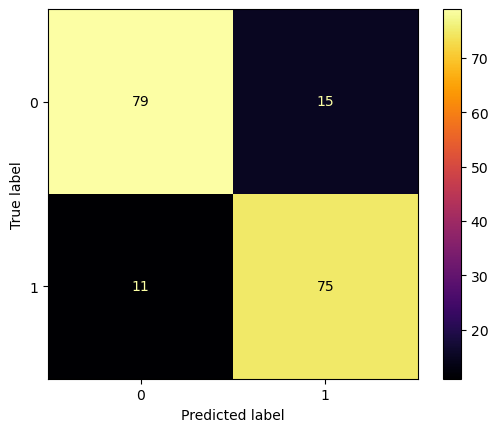

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(log_pipe, X_test, y_test, cmap="inferno")

In [63]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))

In [64]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test) 

Test_Set
[[79 15]
 [11 75]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        94
           1       0.83      0.87      0.85        86

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[317  39]
 [ 56 308]]


## <font color='blue'> <b>Cross Validate</b><font color='black'>

In [65]:
from sklearn.metrics import get_scorer_names

scorers = get_scorer_names()
print(scorers)


['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

In [66]:
model = Pipeline([("scaler",scaler),("log_model",log_model)])

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,0.014994,0.011387,0.820513,0.888179,0.888889,0.847561,0.853333,0.867395,0.847222,0.868827
2,0.011857,0.008663,0.935484,0.887460,0.805556,0.841463,0.865672,0.863850,0.875000,0.865741
3,0.008790,0.005326,0.810811,0.894231,0.833333,0.850610,0.821918,0.871875,0.819444,0.873457
4,0.007886,0.009133,0.970588,0.881029,0.916667,0.835366,0.942857,0.857590,0.944444,0.859568
5,0.008822,0.008313,0.906250,0.891026,0.805556,0.847561,0.852941,0.868750,0.861111,0.870370
6,0.007733,0.005394,0.868421,0.878981,0.916667,0.841463,0.891892,0.859813,0.888889,0.861111
7,0.007564,0.006121,0.818182,0.901274,0.729730,0.865443,0.771429,0.882995,0.777778,0.884259
8,0.009900,0.006103,0.878788,0.900322,0.783784,0.856269,0.828571,0.877743,0.833333,0.879630
9,0.009359,0.006391,0.918919,0.889251,0.918919,0.834862,0.918919,0.861199,0.916667,0.864198
10,0.007760,0.007341,0.968750,0.881789,0.837838,0.844037,0.898551,0.862500,0.902778,0.864198


In [67]:
df_scores.mean()[2:]  

test_precision     0.889671
train_precision    0.889354
test_recall        0.843694
train_recall       0.846464
test_f1            0.864608
train_f1           0.867371
test_accuracy      0.866667
train_accuracy     0.869136
dtype: float64

Because the train and test results do not differ substantially, we can say that there is no overfitting.

## <font color='blue'> <b>GridSearchCV</b><font color='black'>

In [68]:
log_pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('log_model', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'log_model': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'log_model__C': 1.0,
 'log_model__class_weight': None,
 'log_model__dual': False,
 'log_model__fit_intercept': True,
 'log_model__intercept_scaling': 1,
 'log_model__l1_ratio': None,
 'log_model__max_iter': 100,
 'log_model__multi_class': 'auto',
 'log_model__n_jobs': None,
 'log_model__penalty': 'l2',
 'log_model__random_state': None,
 'log_model__solver': 'lbfgs',
 'log_model__tol': 0.0001,
 'log_model__verbose': 0,
 'log_model__warm_start': False}

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
# Pipeline for logistic regression

model = Pipeline([("scaler", scaler), ("log_model", log_model)])

# l1: Lasso, l2: Ridge
penalty = ["l1", "l2"]

C = np.logspace(-1, 5, 20)
class_weight = ["balanced", None]
solver = ["lbfgs", "liblinear", "sag", "saga"]
param_grid = {
    "log_model__penalty": penalty,
    "log_model__C": [C, 1], 
    "log_model__class_weight": class_weight,
    "log_model__solver": solver
}

# To obtain the best model
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=10,
    scoring='accuracy',  # By default, maximizes the score for class 1
    n_jobs=-1)  # To utilize all processors

# Since GridSearchCV also performs Cross Validation, we set return_train_score=True 
# to obtain the scores for both the validation and train sets.
# (The metric score specified in the scoring parameter is returned.)


In [71]:
grid_model.fit(X_train,y_train)

/home/elnur/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/elnur/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/elnur/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/elnur/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/elnur/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/elnur/anaconda3/lib/python3.11/site-packages/sklearn/linear_mode

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log_model__C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                                          1],
                         'log_model__class_weight': ['balanced', None],
                         'log_model__penalty': ['l1', 'l2'],
                         'log_model__solver': ['lbfgs', 'liblinear', 'sag',
                                               'saga']},
             scoring='accuracy')

In [72]:
grid_model.best_params_

{'log_model__C': 1,
 'log_model__class_weight': 'balanced',
 'log_model__penalty': 'l1',
 'log_model__solver': 'liblinear'}

In [73]:
grid_model.best_index_


17

In [74]:
grid_model.best_score_

0.8680555555555556

In [75]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)  

Test_Set
[[79 15]
 [11 75]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        94
           1       0.83      0.87      0.85        86

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[317  39]
 [ 55 309]]


## <font color='blue'> <b>Precision-Recall Curve & ROC (Receiver Operating Curve) and AUC (Area Under Curve)</b><font color='black'>

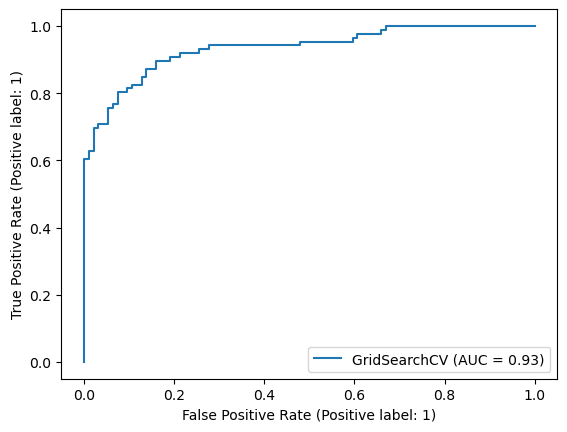

In [76]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(grid_model, X_test, y_test)

In [77]:
# An AUC of 0.93 means that my model is on average 93% successful in distinguishing label 1 from label 0.

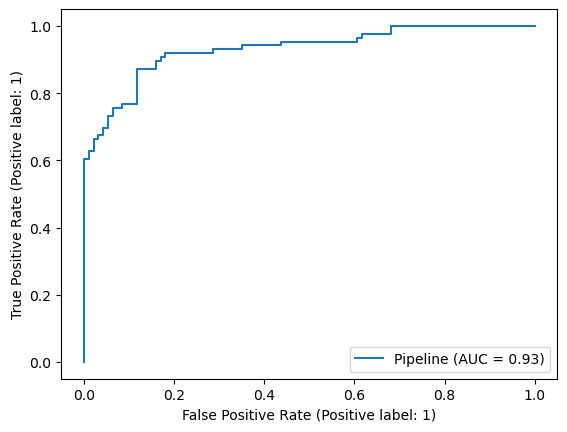

In [82]:
RocCurveDisplay.from_estimator(log_pipe, X_test, y_test);

# before gridsearch



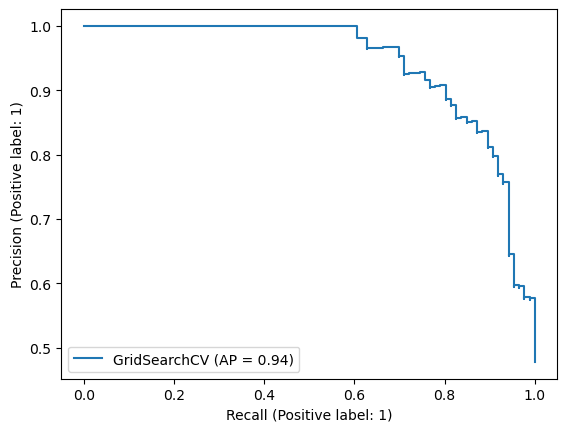

In [80]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test);

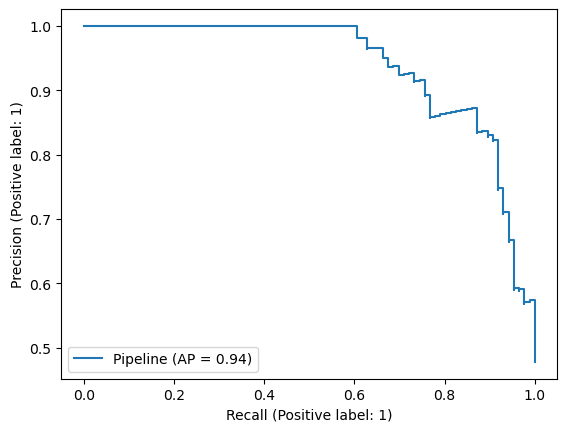

In [81]:
PrecisionRecallDisplay.from_estimator(log_pipe, X_test, y_test)
# before gridsearch

# <font color='green'> <b>Prediction</b><font color='black'>

In [88]:
new_data = df.sample(10).iloc[:,:-1]
new_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
321,55114,317.172325,222.753453,0.711871,56849,0.714254,909.604
878,154498,621.351540,318.597731,0.858538,159694,0.750049,1585.782
206,38585,274.445078,180.957559,0.751829,39926,0.696593,762.439
567,155057,610.677972,325.507681,0.846098,159681,0.761057,1564.694
875,88338,504.482197,227.127509,0.892918,90790,0.727157,1230.493
494,83555,457.546472,235.099871,0.857894,86694,0.711227,1159.779
64,60462,373.342846,208.108626,0.830231,62213,0.665683,990.547
735,122617,503.687576,322.622517,0.767941,131499,0.643254,1429.352
665,85390,403.729750,272.970327,0.736790,88615,0.710500,1156.718
483,92188,374.720164,324.302562,0.500991,95920,0.747600,1190.813


In [90]:
final_scaler = StandardScaler()
final_model = LogisticRegression()
final_pipe = Pipeline([("scaler", final_scaler), ("log_model", final_model)])
final_pipe.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_model', LogisticRegression())])

In [91]:
predictions = final_pipe.predict(new_data)

In [92]:
positive_class_proba = final_pipe.predict_proba(new_data)[:, 1]


In [93]:
results = pd.DataFrame({
    'Prediction': predictions,
    'Positive Class probability': positive_class_proba
})

results

,Prediction,Positive Class probability
0,0,0.063158
1,1,0.996112
2,0,0.022028
3,1,0.994339
4,1,0.874364
5,1,0.703355
6,0,0.258178
7,1,0.952674
8,0,0.457231
9,0,0.238197


# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>Thanks - Hoping it will be helpful</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>"If you want to be the first to know about new updates, please don't forget to follow us." </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |